### Stat 201A HW 
##### Meichen Chen 

#### Problem 1. Simulation of Markov Process

In [1]:
# a. write out Markov Process in matrix representation
import numpy as np

P = np.array([[0.2, 0.7, 0.1], 
              [0.2, 0.5, 0.3], 
              [0.2, 0.4, 0.4]])

print(P)

[[0.2 0.7 0.1]
 [0.2 0.5 0.3]
 [0.2 0.4 0.4]]


In [3]:
# b. simulate one realization of the chain

# Starting state (state 1)
current_state = 0  # Indexing starts from 0, so state 1 is represented as 0

# Recording the states over iterations
states = [current_state + 1]  # Start with state 1 (indexed as 0)

# Simulate the Markov process
for _ in range(30):
    current_state = np.random.choice([0, 1, 2], p=P[current_state, :])
    states.append(current_state + 1)  # Adding 1 to adjust for 0-indexing

# Result
print("States over 20 iterations:", states)

States over 20 iterations: [1, 2, 3, 3, 2, 3, 2, 2, 2, 2, 1, 1, 3, 3, 3, 2, 3, 2, 2, 3, 2, 1, 2, 2, 3, 1, 1, 1, 2, 2, 2]


#### Problem 2. Stationary Distribution 

In [5]:
# a. calculate theoretically the stationary state of the process 

# Calculate the stationary distribution pi_infinity
# Want to solve (P^T - I)pi_infinity = 0

# Calculate P^T - I
A = P.T - np.eye(3)

# Add row for the condition sum(pi_infinity) = 1
A = np.vstack([A, [1, 1, 1]])

# The target vector for the system of equations, last entry is 1 for the sum condition
b = np.array([0, 0, 0, 1])

# Solve the system of equations
pi_infinity = np.linalg.lstsq(A, b, rcond=None)[0]
pi_infinity


array([0.2       , 0.51111111, 0.28888889])

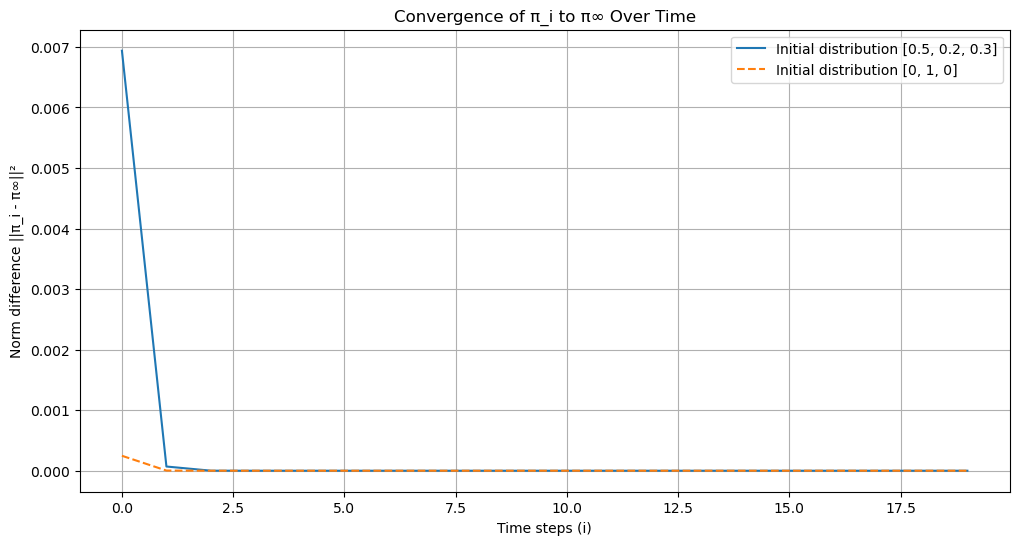

In [8]:
# b. 

import matplotlib.pyplot as plt

# Initial probability distributions
pi0_a = np.array([0.5, 0.2, 0.3])  
pi0_b = np.array([0, 1, 0])  

# The stationary distribution from part a
pi_infinity = np.array([0.2, 0.51111111, 0.28888889])

# Number of time steps
num_steps = 20

# compute the norm difference between pi_i and pi_infinity
def norm_diff(pi_i, pi_inf):
    return np.linalg.norm(pi_i - pi_inf)**2

# Lists to hold the norm differences for each initial distribution
norm_diffs_a = []
norm_diffs_b = []


pi_i_a = pi0_a
pi_i_b = pi0_b

# Compute the probability distribution at each time i and the norm difference
for i in range(num_steps):
    pi_i_a = pi_i_a.dot(P)
    pi_i_b = pi_i_b.dot(P)
    norm_diffs_a.append(norm_diff(pi_i_a, pi_infinity))
    norm_diffs_b.append(norm_diff(pi_i_b, pi_infinity))

# Plot i vs norm differences for both initial distributions
plt.figure(figsize=(12, 6))
plt.plot(range(num_steps), norm_diffs_a, label='Initial distribution [0.5, 0.2, 0.3]')
plt.plot(range(num_steps), norm_diffs_b, label='Initial distribution [0, 1, 0]', linestyle='--')
plt.xlabel('Time steps (i)')
plt.ylabel('Norm difference ||π_i - π∞||²')
plt.title('Convergence of π_i to π∞ Over Time')
plt.legend()
plt.grid(True)
plt.show()


#### 3. Absorbing State

In [57]:
# a. histograms of arrival time for both x_0=1 and x_0=2

import matplotlib.pyplot as plt
times_X_0_1 = []
times_X_0_2 = []
iter = 50000

# sample starting from 1
for i in range(iter):
    count = 0
    current_state = 0
    while ((current_state + 1) != 3):
       current_state = np.random.choice([0, 1, 2], p=P[current_state, :])
       count += 1
    times_X_0_1 = np.append(times_X_0_1, count)

# sample starting from 2

for i in range(iter):
    count = 0
    current_state = 1
    while ((current_state + 1) != 3):
       current_state = np.random.choice([0, 1, 2], p=P[current_state, :])
       count += 1
    times_X_0_2 = np.append(times_X_0_2, count)

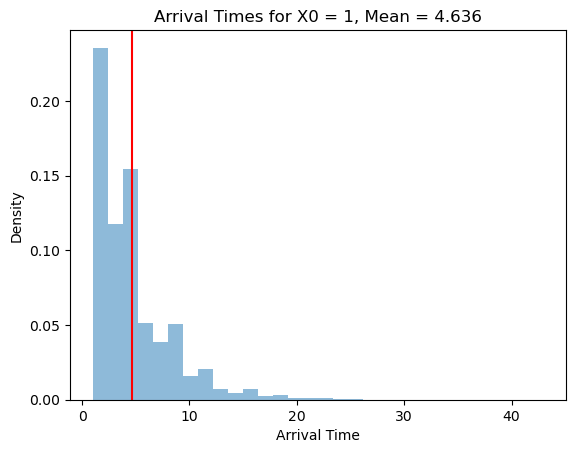

In [58]:
mean_1 = np.mean(times_X_0_1)
# Create the histogram
plt.hist(times_X_0_1, bins=30, alpha=0.5, density = True)
# Add labels and legend
plt.xlabel('Arrival Time')
plt.ylabel('Density')
plt.title('Arrival Times for X0 = 1, Mean = {}'.format(mean_1))
# Plot a vertical line at x = mean_1
plt.axvline(x=mean_1, color='r', linestyle='-')
plt.show()

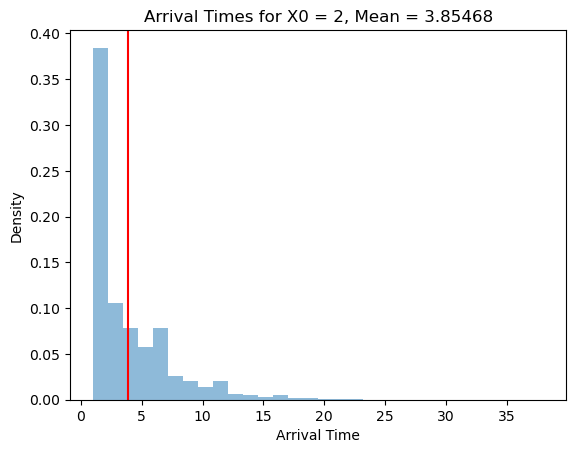

In [59]:
mean_2 = np.mean(times_X_0_2)
# Create the histogram
plt.hist(times_X_0_2, bins=30, alpha=0.5, density = True)
# Add labels and legend
plt.xlabel('Arrival Time')
plt.ylabel('Density')
plt.title('Arrival Times for X0 = 2, Mean = {}'.format(mean_2))
# Plot a vertical line at x = mean_1
plt.axvline(x=mean_2, color='r', linestyle='-')
plt.show()


##### b. Compute theoretically the mean arrival time 

For $i = 1$ and $i = 2$, because state 3 is absorbing, the equations are:

$\mu_1 = 1 + p_{11}\mu_1 + p_{12}\mu_2$

$\mu_2 = 1 + p_{21}\mu_1 + p_{22}\mu_2$

Since state 3 is an absorbing state, $\mu_3 = 0$, the terms involving $\mu_3$ can be dropped. 

Using the transition matrix:

$\mu_1 = 1 + 0.2\mu_1 + 0.7\mu_2$

$\mu_2 = 1 + 0.2\mu_1 + 0.3\mu_2$

Rearranging: 

$0.8\mu_1 - 0.7\mu_2 = 1$

$-0.2\mu_1 + 0.7\mu_2 = 1$

Multiply the second equation by 4:

$0.8\mu_1 - 0.7\mu_2 = 1$

$-0.8\mu_1 + 2.8\mu_2 = 4$

Add the two equations:

$2.1\mu_2 = 5$

$\mu_2 = \frac{5}{2.1} \approx 2.38$

Substitute $\mu_2$ back in:

$0.8\mu_1 - 0.7(2.38) = 1$

$0.8\mu_1 = 1 + 0.7(2.38)$

$\mu_1 = \frac{1 + 0.7(2.38)}{0.8} \approx 3.33$

Mean arrival times are $\mu_1 \approx 3.33$ and $\mu_2 \approx 2.38$, and $\mu_3 = 0$.